In [9]:
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [19]:
warnings.filterwarnings('always')
sick = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(sick.info())
print(sick.shape)
print(sick.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
(5110, 12)
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bm

<AxesSubplot:>

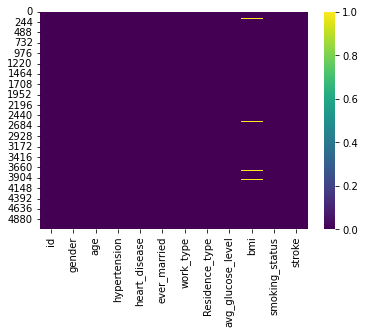

In [20]:
# cheaking for missing values
sea.heatmap(sick.isnull(), cmap='viridis')

In [33]:
# deleating string that contain Nan
sick = sick.dropna()
print(sick.shape)

(4909, 11)


In [34]:
sick = sick.drop(["id"], axis=1)

KeyError: "['id'] not found in axis"

In [32]:
# making num values from str values
sick.head()

for i in sick.columns:
    if sick[i].dtype == "object":
        sick[i] = LabelEncoder().fit_transform(sick[i])


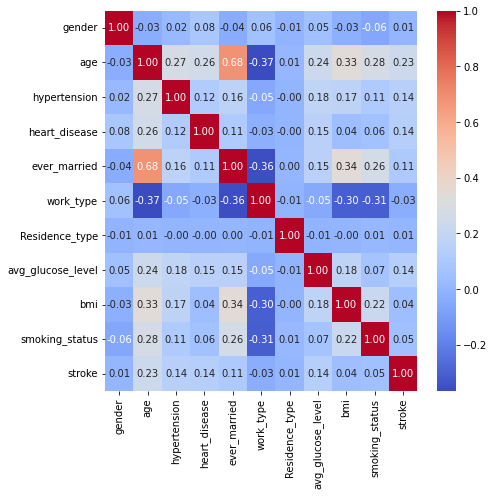

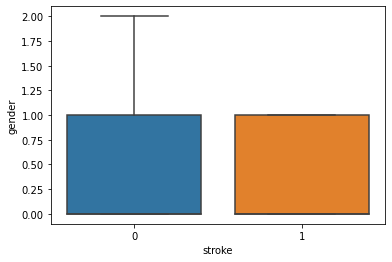

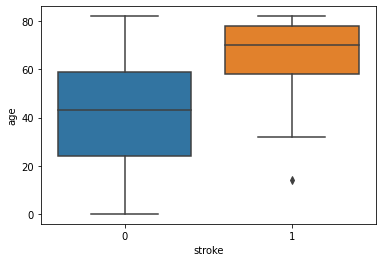

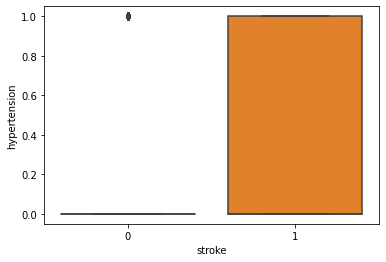

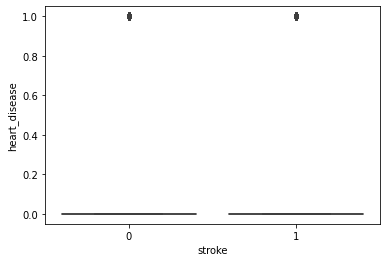

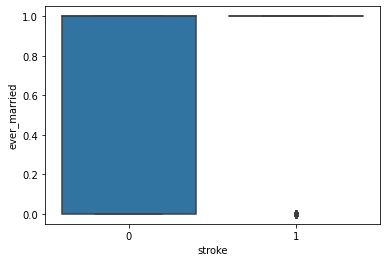

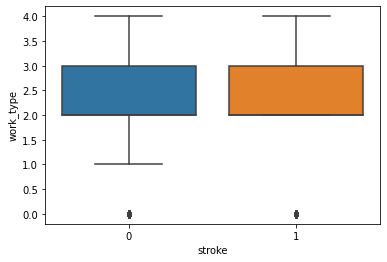

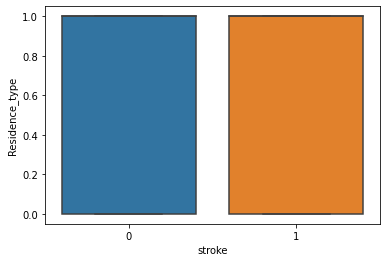

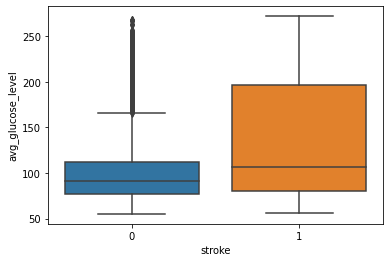

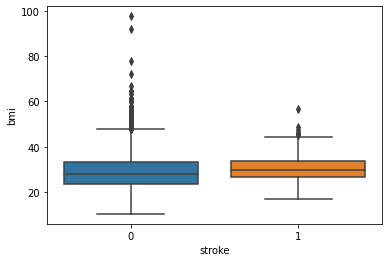

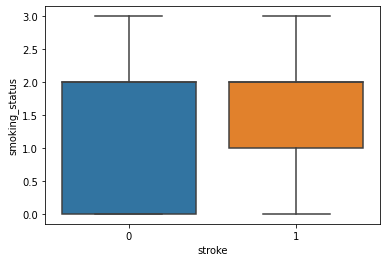

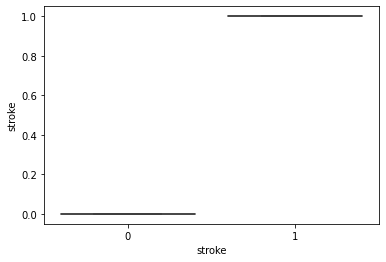

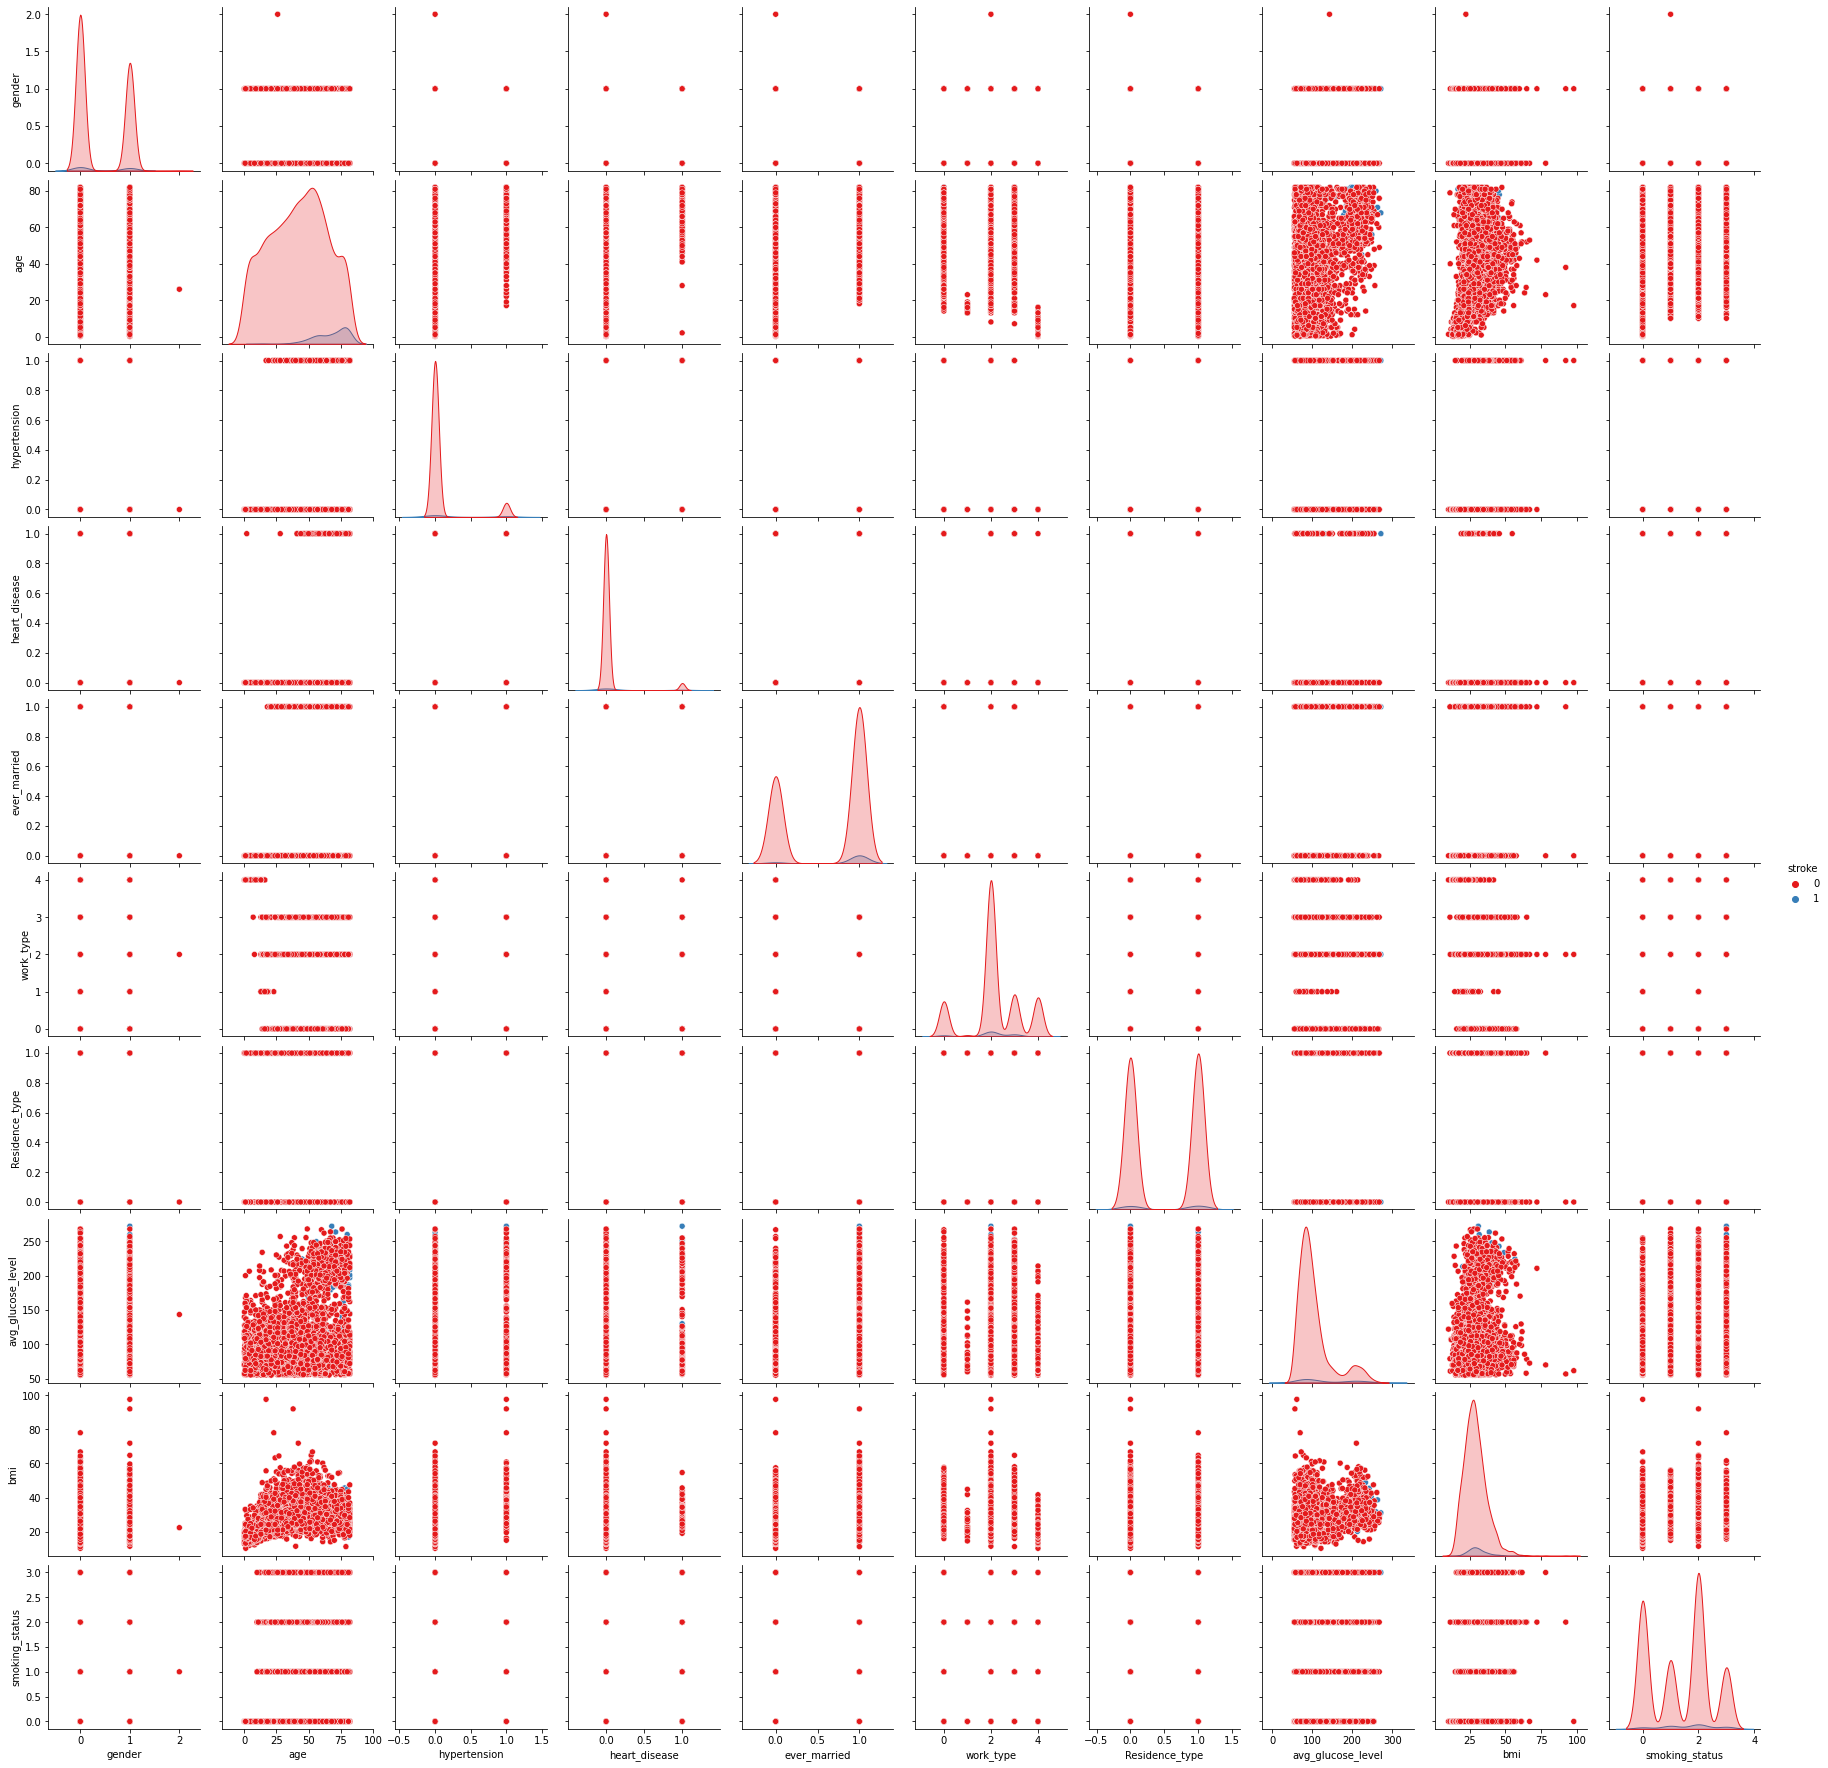

In [24]:
# data vizualization 

corr = sick.corr()
fig, ax = plt.subplots(figsize=(7, 7))
sea.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

for i in sick.columns:
    figure = plt.figure()
    sea.boxplot(x='stroke', y=sick[i], data=sick)
    
sea.pairplot(sick, hue="stroke", palette = 'Set1')

In [25]:
# making test and train parts of df
X = sick.drop(["stroke"], axis=1)
y = sick["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(y_train.shape)

(3927, 10)
(3927,)


In [26]:
# data Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
# Decision Tree
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [28]:
# tree results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       939
           1       0.11      0.09      0.10        43

    accuracy                           0.93       982
   macro avg       0.53      0.53      0.53       982
weighted avg       0.92      0.93      0.92       982

[[905  34]
 [ 39   4]]


In [29]:
# picture of our tree
#plt.figure(figsize = (10, 10))
#plot_tree(tree, feature_names = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
#       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
#       'smoking_status'], 
#          class_names = ["stroke"], filled = True)
#plt.show()

In [30]:
# k nearest neigboors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


In [347]:
# knn results 
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))


[[935   3]
 [ 43   1]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       938
           1       0.25      0.02      0.04        44

    accuracy                           0.95       982
   macro avg       0.60      0.51      0.51       982
weighted avg       0.92      0.95      0.93       982

0.9531568228105907


In [348]:
# knn best neigboors number seach
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

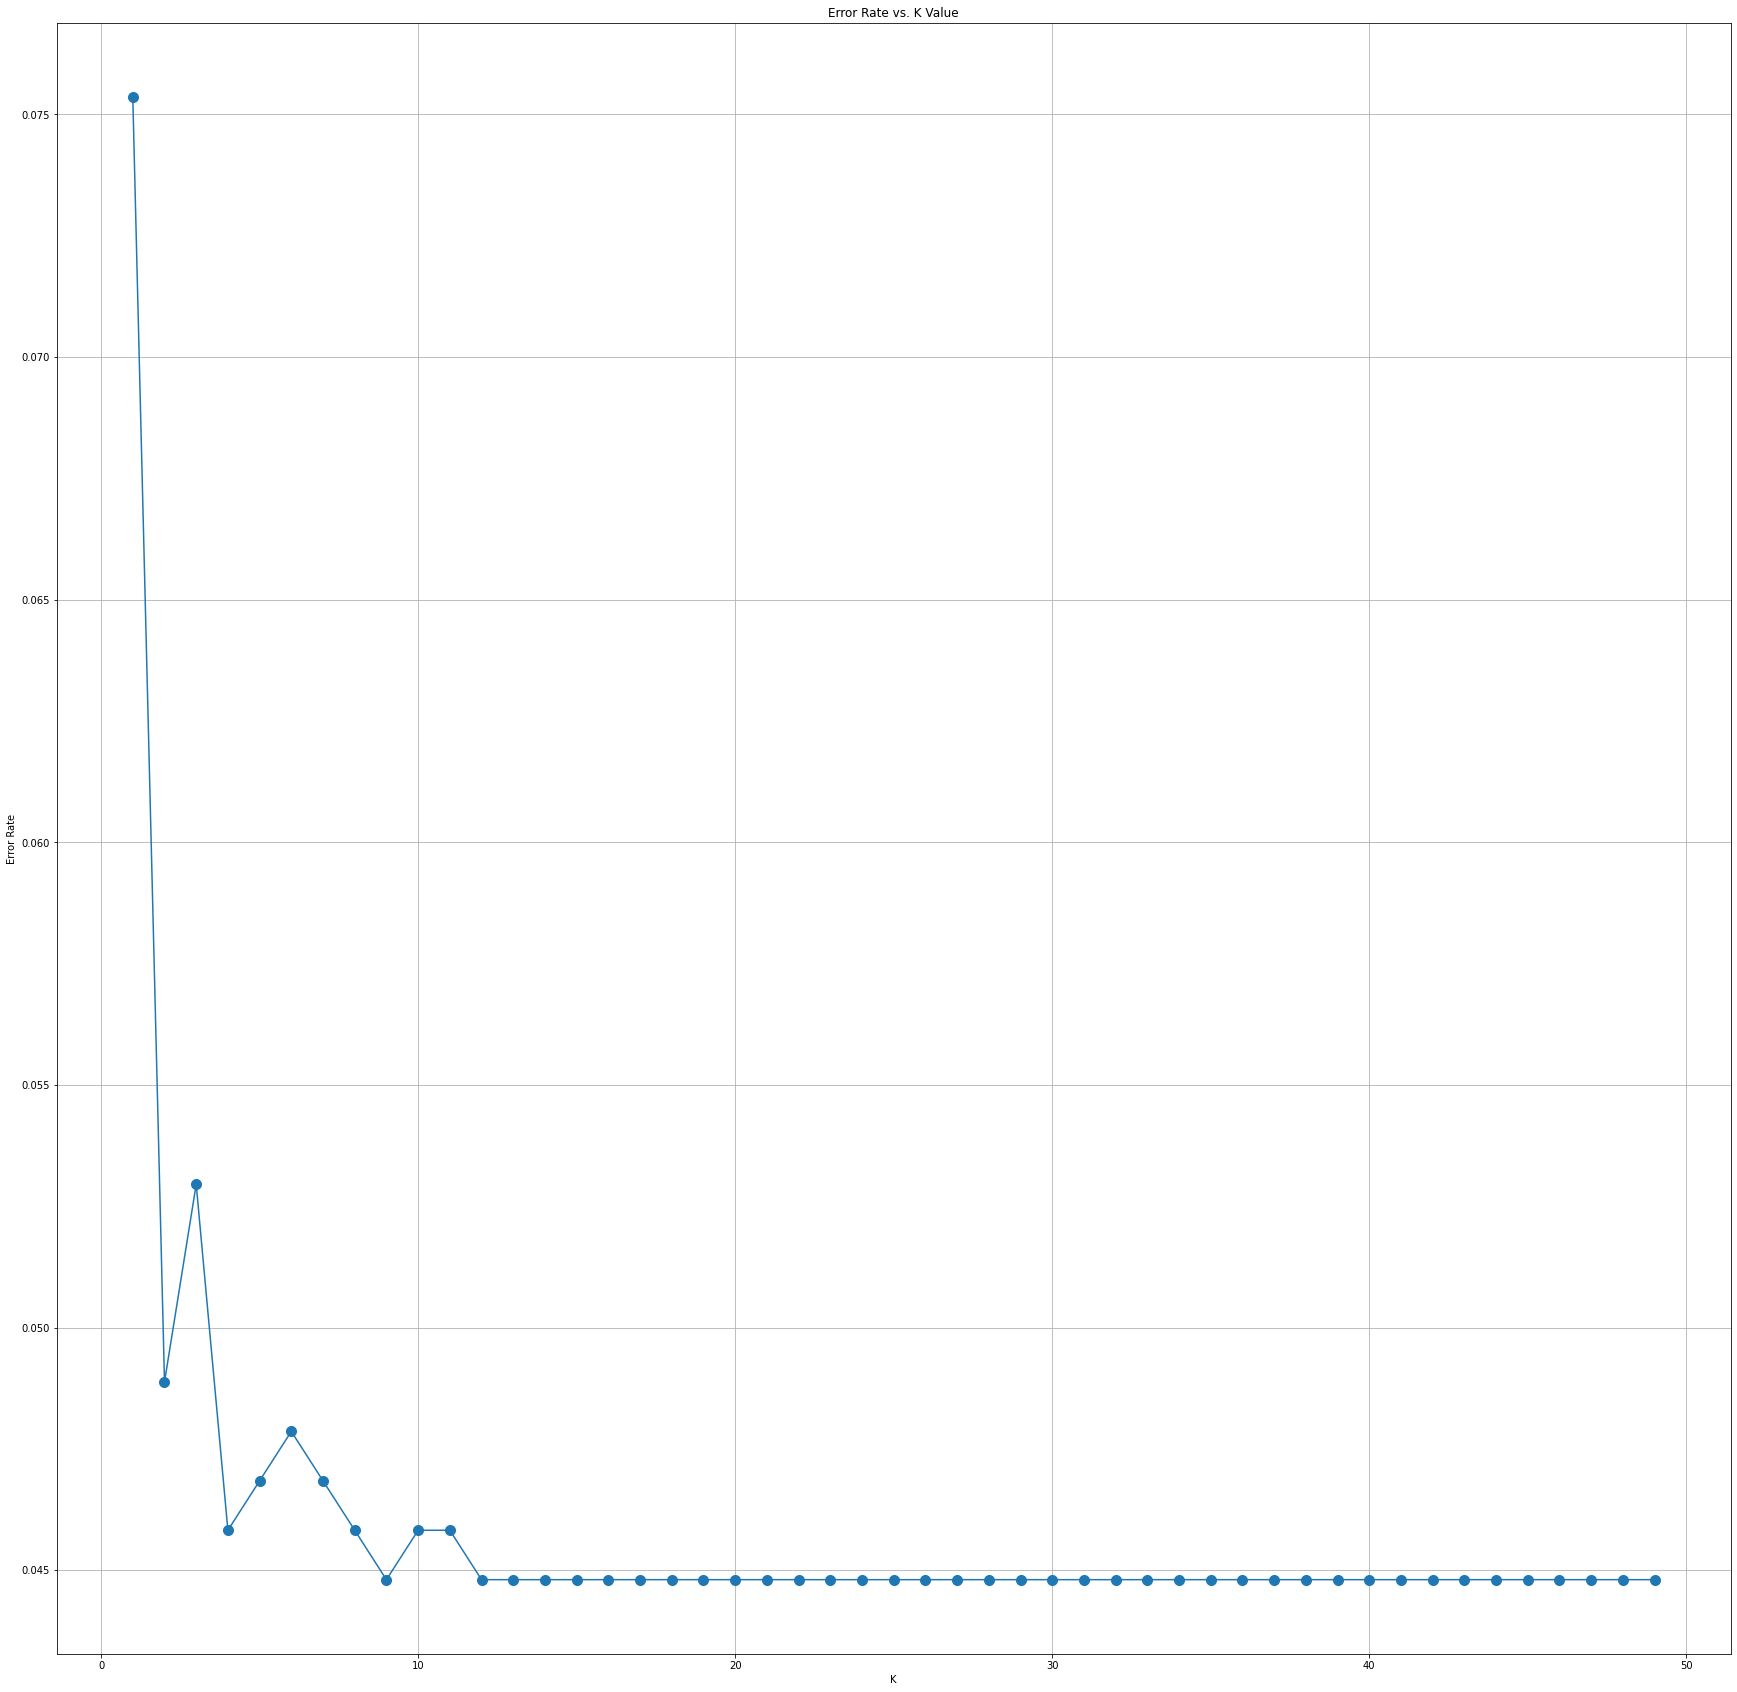

In [349]:
# code for plot
plt.figure(figsize=(30,30))
plt.plot(range(1,50), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [350]:
# best neigboors number > 16

In [351]:
# State vector mashine 
svm = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

In [352]:
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

[[938   0]
 [ 44   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       938
           1       0.00      0.00      0.00        44

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [353]:
# best parameters search 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [354]:
# Random forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [355]:
# rendom forest results
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[937   1]
 [ 44   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       938
           1       0.00      0.00      0.00        44

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982



In [356]:
# ADAboost algoritm, by default it boost Tree
booster = AdaBoostClassifier(n_estimators=50, learning_rate=1)
booster.fit(X_train, y_train)
boostedtree_pred = booster.predict(X_test)

In [357]:
print(confusion_matrix(y_test, boostedtree_pred))
print(classification_report(y_test, boostedtree_pred))

[[937   1]
 [ 44   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       938
           1       0.00      0.00      0.00        44

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982

